In [11]:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


# Model Evaluation and optimization

In the steps of machine learning you:
1. take data
2. build a model
3. evaluate a model
4. optimize it
5. rebuild if needed
Then lookst at new data and the prediction

### Accuracy

Usually the main goal is to make accurate predictions. One measure of performance on a model is how well tha t5model will perform on new data. 

#### Overfitting & model optimism

#### Cross-validation

holdout method because a random subset of the training data is held out from the training process. So you use a training subset to fit the model and only the testing subset to evaluate the accuracy of the model. 

Leave out 20 - 40$ of the data as the testing subset. 



In [12]:
#make up some data
features = rand(100,5)
target = rand(100) > 0.5

In [13]:
#holdout method
N = features.shape[0]
print(N)
N_train = int(floor(0.7 * N))
print(N_train)
#do this step if you want to randomize the index
idx = random.permutation(N)


100
70


In [14]:
#split to training/test
idx_train = idx[:N_train]
idx_test = idx[N_train:]

In [15]:
#split into subsets
features_train = features[idx_train,:]
target_train = target[idx_train]
features_test = features[idx_test,:]
target_test = target[idx_test]

#Then do rest of the machine learning stuff i.e.
#model = train(features_train, target_train)
#preds_test = predict(model, features_test)
#accuracy = evaluate_accuracy(preds_test, target_test)

#### k-fold cross-validation

just like holdout you have to split subsets of training data during the learning process. The difference is k-old begins by randomly splitting the data into k disjoint subsets, called folds. Typically (5, 10, 20)

The predictions are aggregated after all the cycles have been completed. 

In [16]:
#examle
N = features.shape[0]
K = 10 #number of folds you want

preds_kfold = np.empty(N)
folds = np.random.randint(0, K, size=N)

In [17]:
for idx in np.arange(K):
    #each fold break the data into training and testin gsubsets
    features_train = features[folds != idx, :]
    target_train = target[folds != idx]
    features_test = features[folds == idx, :]
    
    print(nonzero(folds == idx)[0])
    
    #build and predict
    #model = train(features_train, target_train)
    #preds_kfold[folds == idx] = predict(model, features_test)
#accuracy = evaluate_acc(preds_kfold, target)

[ 0  8 11 22 24 54 63 69 71 82]
[ 7 19 29 39 44 47 49 51 57 76]
[21 25 42 45 56 65 85]
[15 27 31 40 41 53 61 67]
[ 2 10 17 38 43 70 84 87 98]
[33 58 59 62 64 66 74 83 88 89 91 94 95]
[ 4 12 16 20 52 68 73 77 80]
[ 3 14 32 34 60 72 81 86 90 99]
[ 1  5  6 26 30 46 48 50 55 75]
[ 9 13 18 23 28 35 36 37 78 79 92 93 96 97]


#### Cross-validation

Gives you a way to estimate how accurately your ML models will predict when deployed in the wild. Things to look out for

1. CV methods assume that the training data forms a representative smaple from the population of interest. If you plan to deploy te modle to predict on new data, that data should be well represented by the training data. if not, the cross-validation error estimates may be overly optimistic for the error rates on future data. Solution: Ensure that any potential biases in the training data are addressed and minimized. 
2. Some datasets use features that are temporal-- for instance, using last month's revenue to forecast this month's revenue. If this is the case with your data, you must ensure that features that are available in the future can never be used to predict the past. Solution: you can structure your cross-validation holdout set or k-folds so that all the training set data is collected previous to the testing set. 
The larger the number of folds used in k-fold the better the error estimates will be, but the longer your program will take to run. Solution: use at least 10 folds (or more) when you can. For modles that train and predict quickly, you can use leave-one-out CV (k = number of data instances)

#### Confusion-Matrix

When checking accuracy of aclassifier it may be a good estimate of accuracy by getting a percentage of items classified properly BY class. A confusion matrix could help visualize this. 

i.e. 

2/3 correct as 1
1 of 1 correct as 0
1 of 3 false as 0
0 of 1 false as 1

This then shows the class wide accuracy between ture positive rate, false positive rate, false negative rate and true negative rate. 

#### ROC curves
receiver operating characteristics

In [30]:
#roc curve
def roc_curve(true_labels, predicted_probs, n_points=100, pos_class=1):
    thr = np.linspace(0,1, n_points)
    tpr = zeros(n_points)
    fpr = zeros(n_points)
    
    pos = true_labels == pos_class
    neg = logical_not(pos)
    n_pos = count_nonzero(pos)
    n_neg = count_nonzero(neg)
    
    for i, t in enumerate(thr):
        tpr[i] = count_nonzero(logical_and(predicted_probs >= t, pos)) / n_pos
        fpr[i] = count_nonzero(logical_and(predicted_probs >= t, neg)) / n_neg
    return fpr, tpr, thr

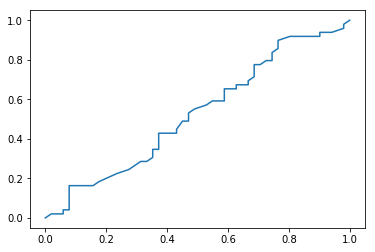

In [31]:
#rando generated predictions should give us a roc curve
preds = rand(len(target))
fpr, tpr, thr = roc_curve(target, preds, pos_class=True)
plot(fpr, tpr)

In [32]:
#the area under the roc curve
def auc(true_labels, predicted_labels, pos_class=1):
    fpr, tpr, thr = roc_curve(true_labels, predicted_labels, pos_class=pos_class)
    area = -trapz(tpr, x=fpr)
    return area

In [33]:
auc(target, preds, pos_class=True)

0.52681072428971598

#### Area Under the Curve (AUC)

The less false positives and missed detections the higher the curve will be to the top left corner. This provides us with another simple metric to judge things on which is the area under the curve. The bigger the curve the better the classification performance. 

AUC is widely used choice for evaluating and comparing models, although in most cases it's important to inspect the full ROC curve in order to understand the performance trade-offs. 

#### Multiclass classifications

The handwriting digits example is one of the most prolific ML cases. The ideas is to scan the handwritten digits and divide them into images with one letter in each. 

Using a random forest algo to build a classifier from the training set and generate the confusion matrix. 

In [35]:
import pandas
d = pandas.read_csv('data/mnist_small.csv')

In [37]:
d_train = d[:int(0.8*len(d))]
d_test = d[int(0.8*len(d)):]

In [38]:
#the the forest algo
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(d_train.drop('label', axis=1), d_train['label'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [40]:
from sklearn.metrics import confusion_matrix
preds = rf.predict(d_test.drop('label', axis=1))
cm = confusion_matrix(d_test['label'], preds)

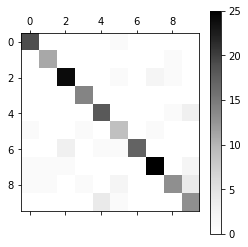

In [42]:
matshow(cm, cmap="Greys")
colorbar()
savefig('figures/multiclass_confusion_matrix.eps', format='eps')

Looking at the confusion matrix above you can see the greatest confusion occurs between digits 4 and 9, 3 and 5, 7 and 9, 2 and 6. This makes sense given the shapes of these and how they can be written by hand. 

For multiclass ROC's you assert that the positive class and that all other classes for that is negative for each class. And so for a 10 digit classifier you would have 10 roc curves (and 10x10 technically).

#### Evaluation of regression models

Classification models have a 'correct' prediction where regressions work on a numerical scale. A numeric prediction is in general unlikely to be exactly right, but it can be close to or fra from the correct value. So most evaluations focus on numerical distance from the correct value. 

This degree of uncertainty is known as the error. 

##### Roote-mean-square error (RMSE) and R^2

This looks at the difference from each of the predicted values to the known values, and calculates the mean in a way that's immune to the fact that predicted values can be both higher and lower than the actual values. 

RMSE provides the same units as the values themselves but this also means that you can't easilly compare across datasets. If the predicted or actual values are larger numbers the RMSE will be correspondingly higher. This won't be a problem when comparing models in the same project it can challenge the understanding of the overall model performance and comparing it to othermodels in general. 

to help overcome this it can be worthwhile to compute R-squared. This is a relative response in the 0 to 1 range. If the model can predict the data better the R^2 value is closer to 1. 




In [62]:
#RMSE
def rmse(true_values, predicted_values):
    n = len(true_values)
    residuals = 0
    for i in range(n):
        residuals += (true_values[i] - predicted_values[i]) **2.
    return np.sqrt(residuals/n)

In [63]:
rmse(rand(10), rand(10))

0.38977403076025041

In [64]:
#r^2
def r2(true_values, predicted_values):
    n=len(true_values)
    mean = np.mean(true_values)
    residuals = 0
    total = 0
    for i in range(n):
        residuals += (true_values[i] - predicted_values[i])**2.
        total += (true_values[i] - mean) **2.
    return 1.0 - residuals/total

In [65]:
r2(arange(10)+rand(), arange(10)+rand(10))

0.9911028599294005

#### parameter tuning

each ML algo containts different set of tuning parameters that control how the algo uses training data to build a model. As the algos become more sophisticated, typically the tuning parameters become more numerous and esoteric. 

Logist Regression: none
k-nearest neighbors: number of nearest neighbors to average
decision trees:
1. splitting criterion
2. max depth of tree
3. minimum samples needed to make a split
Kernal SVM:
1. kernal type
2. kernel coefficient
3. penalty parameter
Random forest:
1. number of trees
2. number of features to split in each node
3. splitting criterion
4. minimum samples needed to make a split
Boosting:
1. number of trees
2. number of features to split in each node
3. learning rate
4. max depth of tree
5. splittin gcriterion
6. minimum samples needed to make a split

#### Grid search



In [66]:
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC

In [67]:
d = pandas.read_csv('data/titanic.csv')

#target
y = d["Survived"]

# Features
X = d.drop(["Survived", "PassengerId", "Cabin","Ticket","Name", "Fare"], axis=1)
X['Sex'] = map(lambda x: 1 if x=="male" else 0, X['Sex'])
X['Embarked-Q'] = map(lambda x: 1 if x=="Q" else 0, X['Embarked'])
X['Embarked-C'] = map(lambda x: 1 if x=="C" else 0, X['Embarked'])
X['Embarked-S'] = map(lambda x: 1 if x=="S" else 0, X['Embarked'])
X = X.drop(["Embarked", "Sex"], axis=1)
X = X.fillna(-1)

In [72]:
# grid of (gamma, C) values to try 
gam_vec, cost_vec = np.meshgrid(np.linspace(0.01, 10, 11),
                     np.linspace(0.01, 10, 11))

AUC_all = [] # initialize empty array to store AUC results

# set up cross-validation folds
N = len(y)
K = 10 # number of cross-validation folds
folds = np.random.randint(0, K, size=N)

# search over every value of the grid
for param_ind in np.arange(len(gam_vec.ravel())):

    # initialize cross-validation predictions
    y_cv_pred = np.empty(N)

    # loop through the cross-validation folds
    for ii in np.arange(K):
        # break your data into training and testing subsets
        X_train = X.iloc[folds != ii,:]
        y_train = y.iloc[folds != ii]
        X_test = X.iloc[folds == ii,:]

        # build a model on the training set
        model = SVC(gamma=gam_vec.ravel()[param_ind], C=cost_vec.ravel()[param_ind])
        model.fit(X_train, y_train)

        # generate and store model predictions on the testing set
        y_cv_pred[folds == ii] = model.predict(X_test)

    # evaluate the AUC of the predictions
    AUC_all.append(roc_auc_score(y, y_cv_pred))

indmax = np.argmax(AUC_all)
print( "Maximum = %.3f" %(np.max(AUC_all)) )
print( "Tuning Parameters: (gamma = %.2f, C = %.2f)" % (gam_vec.ravel()[indmax], cost_vec.ravel()[indmax]) )

TypeError: float() argument must be a string or a number, not 'map'

In [55]:
AUC_grid = np.array(AUC_all).reshape(gam_vec.shape)

contourf(gam_vec, cost_vec, AUC_grid, 20, cmap='Greys')
xlabel("kernel coefficient, gamma")
ylabel("penalty parameter, C")
colorbar()
savefig("figures/figure-4.25.eps", format='eps')

NameError: name 'AUC_all' is not defined